*Welcome!*

# **Financial Bank Credit Analysis**

For this financial analytics project, insights will be drawn through data visualization and extensive analysis to do an exploratory data study of stock prices in respective banks (Bank of America, CitiGroup, Goldman Sachs, JPMorgan Chase, Morgan Stanley and Wells Fargo) during the financial crisis from January 1st, 2006 through January 1st, 2016. It is pertinent to note that even though this project analytics is a core and indepth analysis, it should not be taken as a financial advice nor intended to be a how-to guide. 
>Let's Begin!

**Importing Libaries**

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

**Getting Data**

> Data Source - Quandl

We'll be working on the stock information for 6 larger banks during the financial crisis from January 1st, 2006 through January 1st, 2016. This banks include

*   Bank of America
*   CitiGroup
*   Goldman Sachs
*   JPMorgan Chase
*   Morgan Stanley
*   Wells Fargo

In [3]:
#From the pandas_datareader documentation
import pandas_datareader.data as web

In [4]:
!pip install quandl


In [5]:
#From quandl documentation
import quandl
quandl.ApiConfig.api_key = "z2B42HPge4T9iXzMBghH"

In [6]:
quandl_api_key ="z2B42HPge4T9iXzMBghH"

In [7]:
#Setting Jan 1st, 2006 through Jan 1st, 2016 as our dates for this analysis
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [8]:
#Bank of America
Bank_America = web.DataReader('WIKI/BAC','quandl',start,end,api_key = quandl_api_key)

In [9]:
#Let's get a quick look of the data
Bank_America.head(7)

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2015-12-31,17.01,17.07,16.830,16.83,47106760.0,0.0,1.0,16.564256,16.622684,16.388973,16.388973,47106760.0
2015-12-30,17.20,17.24,17.040,17.05,35035518.0,0.0,1.0,16.749277,16.788229,16.593470,16.603208,35035518.0
2015-12-29,17.25,17.35,17.160,17.28,45628449.0,0.0,1.0,16.797967,16.895347,16.710326,16.827181,45628449.0
2015-12-28,17.22,17.23,16.980,17.13,41759993.0,0.0,1.0,16.768753,16.778491,16.535042,16.681112,41759993.0
2015-12-24,17.32,17.38,17.220,17.27,29373415.0,0.0,1.0,16.866133,16.924561,16.768753,16.817443,29373415.0
2015-12-23,17.16,17.34,17.095,17.34,65700709.0,0.0,1.0,16.710326,16.885609,16.647029,16.885609,65700709.0
2015-12-22,17.05,17.11,16.850,17.08,56144957.0,0.0,1.0,16.603208,16.661636,16.408449,16.632422,56144957.0


In [10]:
#CitiGroup
CitiGroup = web.DataReader('WIKI/C','quandl',start,end,api_key = quandl_api_key)

In [11]:
#Goldman Sachs
Goldman_Sachs = web.DataReader('WIKI/GS','quandl',start,end,api_key = quandl_api_key)

In [12]:
#JPMorgan Chase
JPM_Chase = web.DataReader('WIKI/JPM','quandl',start,end,api_key = quandl_api_key)

In [13]:
#Morgan Stanley
Mo_Stanley = web.DataReader('WIKI/MS','quandl',start,end,api_key = quandl_api_key)

In [14]:
#Wells Fargo
W_Fargo = web.DataReader('WIKI/WFC','quandl',start,end,api_key = quandl_api_key)

In [15]:
# Combine all bank data  into one dataframe
BankNames = [Bank_America,CitiGroup,Goldman_Sachs,JPM_Chase,Mo_Stanley,W_Fargo]
BankNames_str = ['Bank_America','CitiGroup','Goldman_Sachs','JPM_Chase','Mo_Stanley','W_Fargo']
BankStocks = pd.concat(BankNames,axis=1,keys = BankNames_str).sort_values(by='Date')
#note that we added keys to help track what data belongs to which bank

#adding column names to make it easier to read and understand
BankStocks.columns.names = ['Bank Name','Stock Info']
BankStocks.head()

Bank Name  Bank_America                ...    W_Fargo                       
Stock Info         Open   High    Low  ...     AdjLow   AdjClose   AdjVolume
Date                                   ...                                  
2006-01-03        46.92  47.18  46.15  ...  22.507619  23.016287  11016400.0
2006-01-04        47.00  47.24  46.45  ...  22.630277  22.749327  10870000.0
2006-01-05        46.58  46.83  46.32  ...  22.590594  22.724074  10158000.0
2006-01-06        46.80  46.91  46.35  ...  22.644707  22.857554   8403800.0
2006-01-09        46.72  46.97  46.36  ...  22.767364  22.853946   5619600.0

[5 rows x 72 columns]

## Exploratory Data Analysis

>Let's start by finding the max close price for each bank's stock during this period.

In [16]:
BankStocks.unstack().xs('Close',level=1).groupby('Bank Name').max()

Bank Name
Bank_America      54.90
CitiGroup         60.34
Goldman_Sachs    247.92
JPM_Chase         70.08
Mo_Stanley        89.30
W_Fargo           73.00
dtype: float64

>From the above output, it can be deduced that the highest close over the said period was Goldman Sachs with 247.92. Seconded by Morgan Stanley with 89.30

In stocks we're also interested in the return (the percent change) of the stocks

In [17]:
returns = BankStocks.pct_change().xs('Close', level = 'Stock Info', axis=1)
returns.columns = ["Bank_America", "CitiGroup", "Goldman_Sachs ", "JPM_Chase", "M_Stanley", "W_Fargo"]
returns.columns.names = ['Return']
returns.head()

Return,Bank_America,CitiGroup,Goldman_Sachs,JPM_Chase,M_Stanley,W_Fargo
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


>Let's take a look at this return data as a whole, using a seaborn pairplot to quickly plot the results against each other and generate distribution plots. We should see that the data follows an approximately positive linear path (higher the return in one bank, higher the return in another since they share the same industry except one significantly outperforms the rest.)

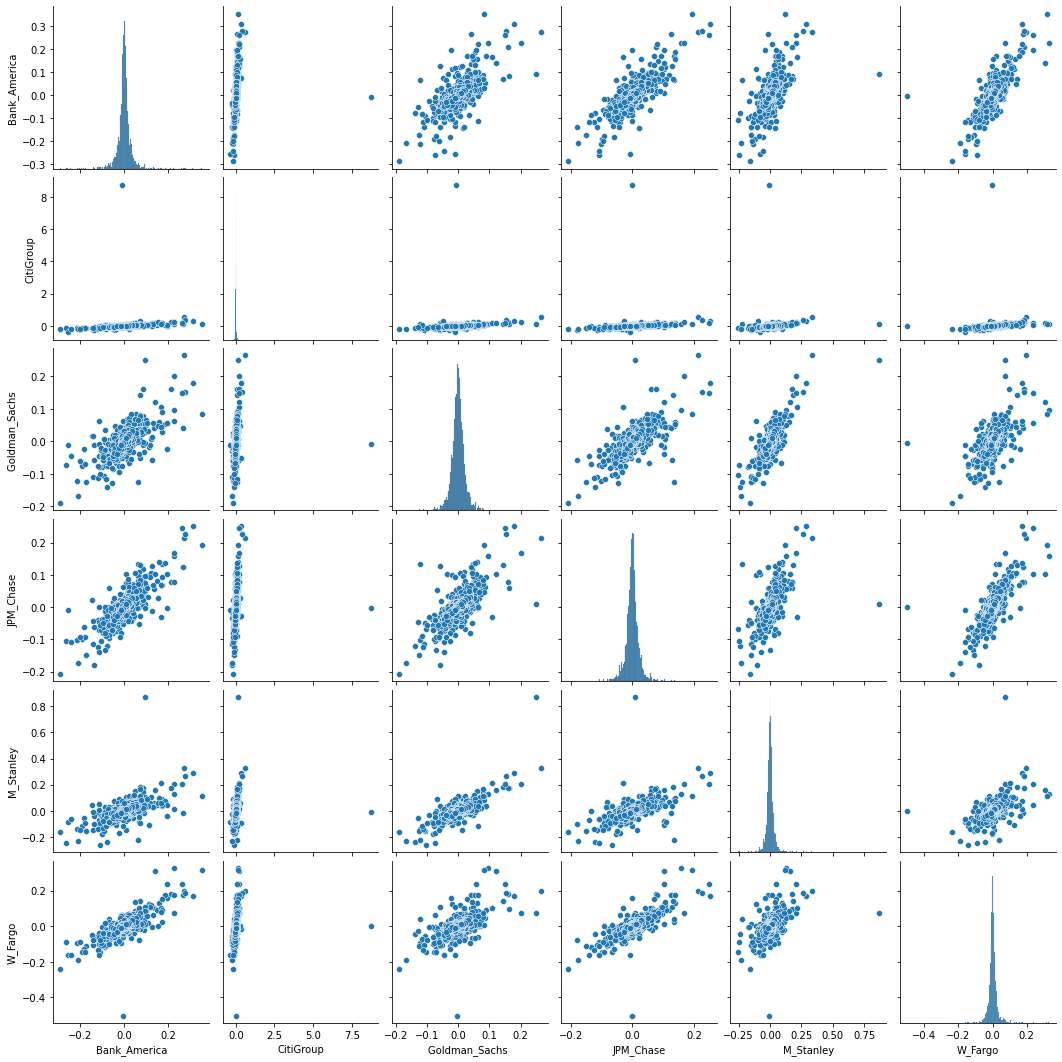

In [18]:
sns.pairplot(returns)

>We see a positive, linear line of data points for the most part, which is exactly what we expected. However, we observe that Citigroup differs significantly from the rest of the plots. This appears to be the result of a lone outlier. We also see that the axes are all different, making it difficult to compare banks as easily as we should be able to. Let's correct it with some more plotting.

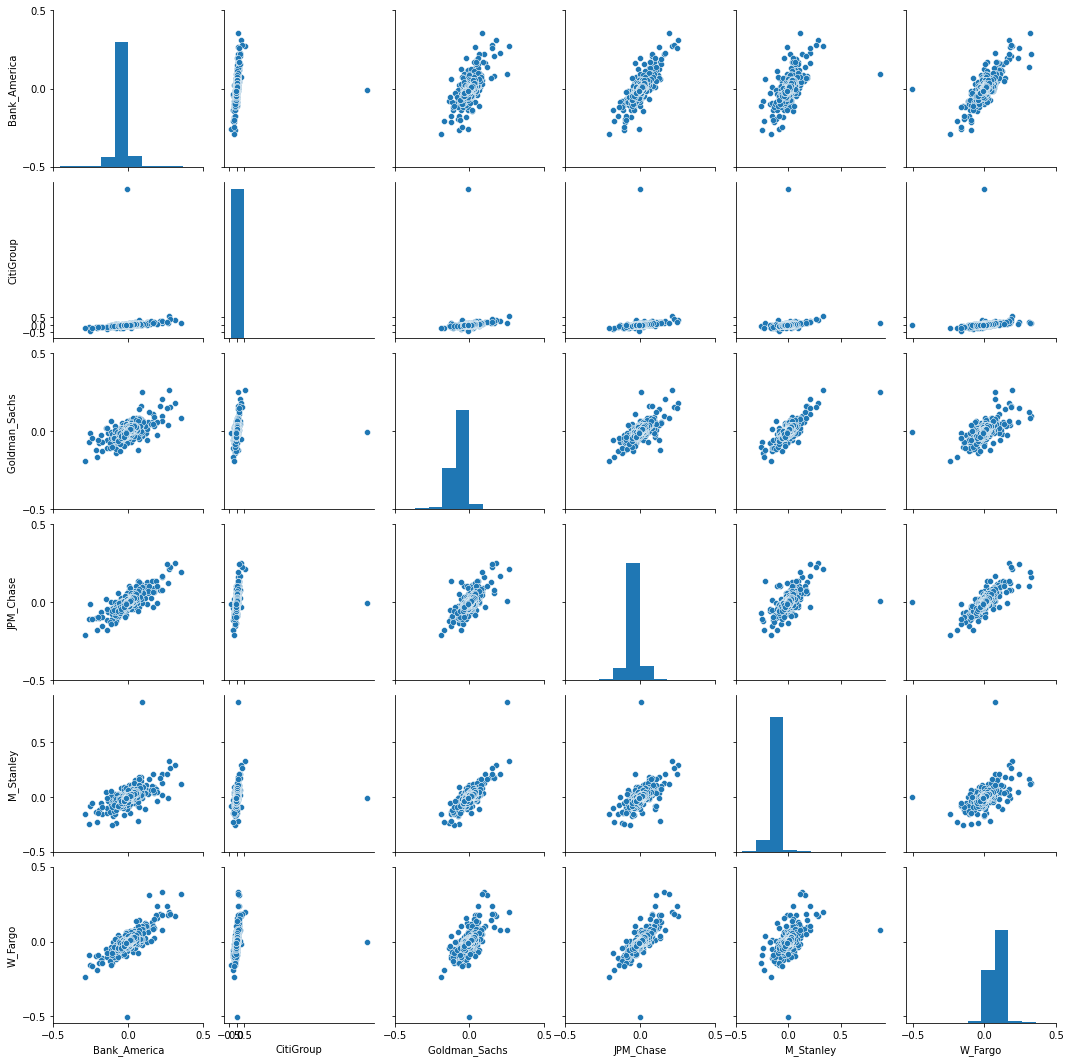

In [19]:
#Using a Pair Grid for more flexibility.
g = sns.PairGrid(returns.dropna())
g.map_diag(plt.hist)
g.map_upper(sns.scatterplot)
g.map_lower(sns.scatterplot)

for ax in g.axes.flat:
    ax.set_yticks([-.5,0,.5])
    ax.set_xticks([-.5,0,.5])

>Even though this did not assist us comprehend Citigroup, it does make it a little easier to compare the other banks to one another. We can see that if the points don't form a clear shape or are oriented vertically or horizontally, they are not associated; but, if they are oriented diagonally from bottom left to top right, they are more correlated. JP Morgan and Wells Fargo, which are quite close to a diagonal line, are a nice example of a  correlated relationship. Morgan Sachs and Wells Fargo, for example, have little association because neither has a physical form or shape.

Now, let's look into this correlation using heat and cluster maps to give us more understanding of how these banks are connected.

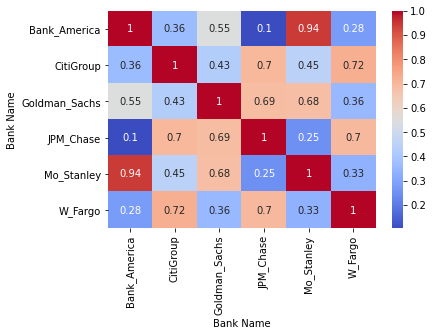

In [20]:
sns.heatmap(BankStocks.xs('Close',level=1,axis=1).corr(),annot=True,cmap='coolwarm')

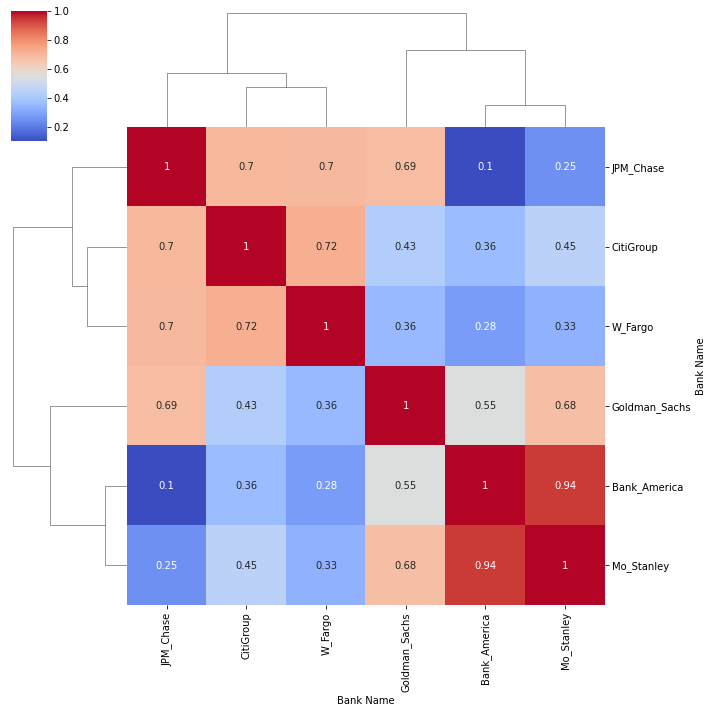

In [21]:
sns.clustermap(BankStocks.xs('Close',level=1,axis=1).corr(), cmap='coolwarm', annot=True)

>  It can be seen that the bank combinations that was previously indicated as likely to be associated/correlated (i.e JP Morgan and Wells Fargo) are really more correlated than those we previously designated as un-correlated (i.e Morgan Sachs and Wells Fargo)

> We can see that just by looking at these relationship graphically, we can get a sense of what they're like and where to search for more confirmation and study, ultimately leading to insights after those correlations are confirmed.

As a case Study, we could say that, directionally, Morgan Stanley  and Bank of America would go in the same direction. Then hypothesize-ing that Morgan Stanley and Bank of America would have similar returns.

To test if this hypothesis is true or not, let's make another heatmap of the returns data to see if it's correlated.

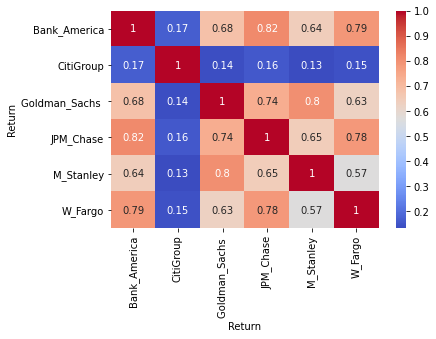

In [22]:
#returns data correlated heat map
sns.heatmap(returns.dropna().corr(), annot = True, cmap='coolwarm')

>From the plot, it can be seen that the returns for Morgan Stanley and Bank of America aren't as correlated as we expected. Let's explore why this could be the case

In [23]:
#maybe the average magnitude of the stock prices are big enough to skew this
BankStocks.xs('Close',level=1, axis=1).agg('mean')

Bank Name
Bank_America      22.174575
CitiGroup         33.001709
Goldman_Sachs    158.481289
JPM_Chase         45.985346
Mo_Stanley        36.006091
W_Fargo           37.615326
dtype: float64

>From the above, we can see that Morgan Stanley's average stock price is nearly double that of Bank of America's. As a result, even if the stock move is strongly correlated, the magnitude return % of that move will be different due to the differing starting magnitudes, resulting in percent returns that are different enough to diminish the correlation between the two.

Let's keep looking through the returns dataframe we created to see what we can find. Let's look at each bank's single best and worst day returns.

In [24]:
#min single day return % date
returns.dropna().idxmin()

Return
Bank_America     2009-01-20
CitiGroup        2009-02-27
Goldman_Sachs    2009-01-20
JPM_Chase        2009-01-20
M_Stanley        2008-10-09
W_Fargo          2006-08-14
dtype: datetime64[ns]

>On the same date, three of the banks had the lowest return percent. According to our study into what transpired on January 20th, 2009, former President Barack Obama was sworn in as President of the United States. Wallstreet appears to have reacted to the shift in political climate.

In [25]:
#max single day return % date
returns.dropna().idxmax()

Return
Bank_America     2009-04-09
CitiGroup        2011-05-09
Goldman_Sachs    2008-11-24
JPM_Chase        2009-01-21
M_Stanley        2008-10-13
W_Fargo          2008-07-16
dtype: datetime64[ns]

> JP Morgan essentially bounced back the day following Barack Obama's inauguration, according to the maximum returns. This means that we can't read too much into stock movements as a result of Obama's inauguration; all we can say is that stocks are volatile when major political changes occur.

>What we're curious about is why Citigroup's return datapoint was so high as depicted earlier in the scatterplot graphs. After additional analysis, we discovered that Citigroup had effected a "reverse stock split" on May 9th, 2011. The reverse stock split effectively consolidated ten shares into one while maintaining the value per share. This means that the value per share remained the same but was essentially combined, resulting in a perceived 10x the value of the share at the time, which is why citigroup's returns % graph had such a big anomaly.

Let's look at the bank returns' standard deviation (also known as volatility) over time.

In [26]:
returns.dropna().std()

Return
Bank_America      0.036628
CitiGroup         0.179066
Goldman_Sachs     0.025358
JPM_Chase         0.027651
M_Stanley         0.037820
W_Fargo           0.031838
dtype: float64

>Citigroup appears to have the largest volatility throughout the 10-year period, and hence could be considered the riskiest of the equities. However, much of this disparity is most likely attributable to the previously discovered outlier. Let's take a look at the results from other years to see how they compare in general.

In [27]:
#2007
returns.dropna().reset_index()[returns.dropna().reset_index()['Date'].dt.year==2007].std()

Return
Bank_America      0.013765
CitiGroup         0.018235
Goldman_Sachs     0.021539
JPM_Chase         0.016850
M_Stanley         0.024872
W_Fargo           0.016979
dtype: float64

In [28]:
#2008, the year of the financial crisis
returns.dropna().reset_index()[returns.dropna().reset_index()['Date'].dt.year==2008].std()

Return
Bank_America      0.062934
CitiGroup         0.073523
Goldman_Sachs     0.050015
JPM_Chase         0.053134
M_Stanley         0.087604
W_Fargo           0.052382
dtype: float64

In [29]:
#2015
returns.dropna().reset_index()[returns.dropna().reset_index()['Date'].dt.year==2015].std()

Return
Bank_America      0.016163
CitiGroup         0.015289
Goldman_Sachs     0.014046
JPM_Chase         0.014017
M_Stanley         0.016249
W_Fargo           0.012591
dtype: float64

> While Citigroup has the largest standard deviation throughout the period, Morgan Stanley has a larger standard deviation in 2008. As a result, considering Citigroup's standard deviation over the entire period is more than 4 times that of Morgan Stanley, we may conclude that this rise is most likely related to the reverse stock split anomaly.

Let's take a look at the return distributions for Citigroup (C) and Morgan Stanley (MS), the two most volatile banks at the time, for the years 2007, 2008, and 2015. To make it easier to compare these years, we'll make all of the x-axis in each graph equal.


Text(0.5, 0.98, ' Returns Distribution for Year 2007')

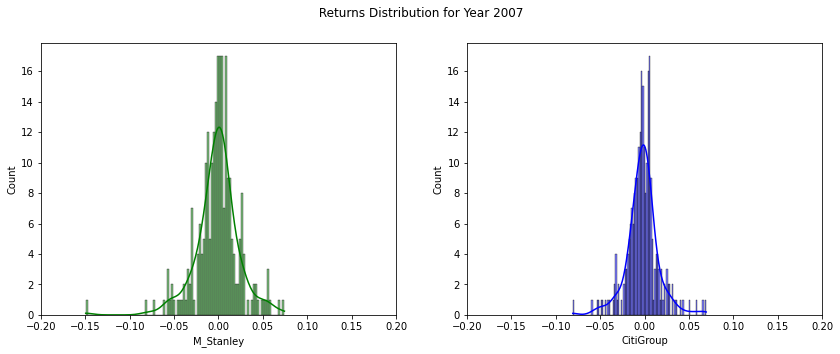

In [44]:
#Returns Distribution For Year 2007
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
#MS
sns.histplot(returns.dropna().reset_index()[returns.dropna().reset_index()['Date'].dt.year==2007]['M_Stanley'], bins=100,color = 'green',kde=True, ax=axes[0])
#C
sns.histplot(returns.dropna().reset_index()[returns.dropna().reset_index()['Date'].dt.year==2007]['CitiGroup'], bins=100,color = 'blue',kde=True, ax=axes[1])
axes[0].get_shared_x_axes().join(axes[0], axes[1])
axes[0].get_shared_y_axes().join(axes[0], axes[1])
axes[0].set_xlim(-.2,.2)
fig.suptitle(' Returns Distribution for Year 2007')

Text(0.5, 0.98, 'Returns Distribution for Year 2008')

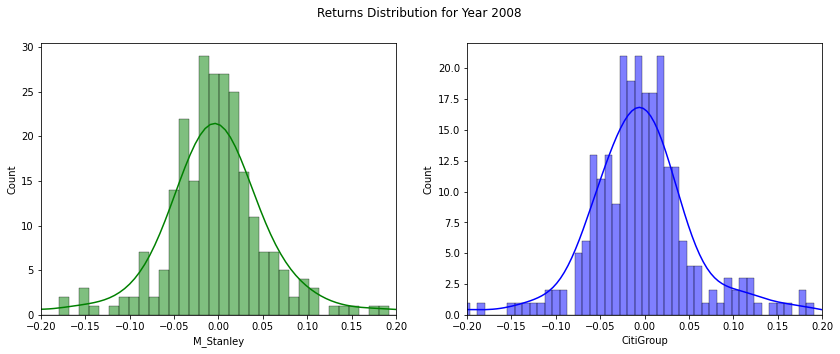

In [41]:
#Returns Distribution for Year 2008
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
#MS
sns.histplot(returns.dropna().reset_index()[returns.dropna().reset_index()['Date'].dt.year==2008]['M_Stanley'], bins=100,color = 'green',kde=True, ax=axes[0])
#C
sns.histplot(returns.dropna().reset_index()[returns.dropna().reset_index()['Date'].dt.year==2008]['CitiGroup'], bins=100,color = 'blue',kde=True, ax=axes[1])
axes[0].get_shared_x_axes().join(axes[0], axes[1])
axes[0].get_shared_y_axes().join(axes[0], axes[1])
axes[0].set_xlim(-.2,.2)
fig.suptitle('Returns Distribution for Year 2008')

Text(0.5, 0.98, 'Returns Distribution for Year 2015')

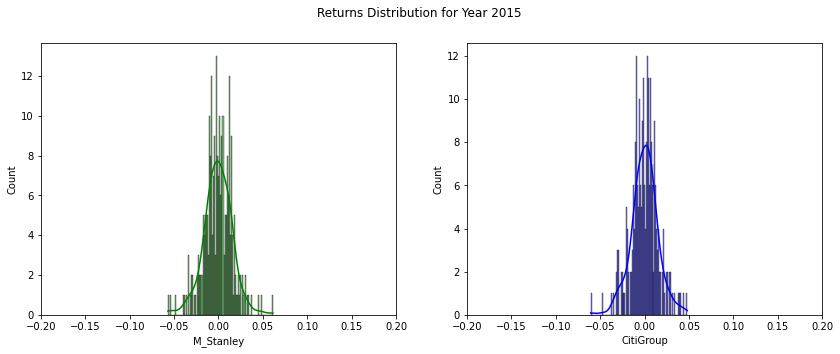

In [43]:
#Returns Distribution for Year 2015 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
#MS
sns.histplot(returns.dropna().reset_index()[returns.dropna().reset_index()['Date'].dt.year==2015]['M_Stanley'], bins=100,color = 'green', kde=True, ax=axes[0])
#C
sns.histplot(returns.dropna().reset_index()[returns.dropna().reset_index()['Date'].dt.year==2015]['CitiGroup'], bins=100,color = 'blue',kde=True, ax=axes[1])
axes[0].get_shared_x_axes().join(axes[0], axes[1])
axes[0].get_shared_y_axes().join(axes[0], axes[1])
axes[0].set_xlim(-.2,.2)
fig.suptitle('Returns Distribution for Year 2015')

>We can observe that, as expected, the variance in 2008 is substantially larger due to the financial crisis's volatility.

Let's take a look at the closing prices of all of these stocks during this time period - in other words, let's examine how each stock has changed over time.

As projected, the worst of the downturn occurred in 2008. Let's take a look at some rolling averages for a few of these financial institutions.

In [46]:
#to make it clear and easier to follow, we'll make a new dataframe for each graph we do
ClosingBankStocks_2008=BankStocks.xs('Close',level=1, axis=1).reset_index()[BankStocks.xs('Close',level=1, axis=1).reset_index()['Date'].dt.year==2008]

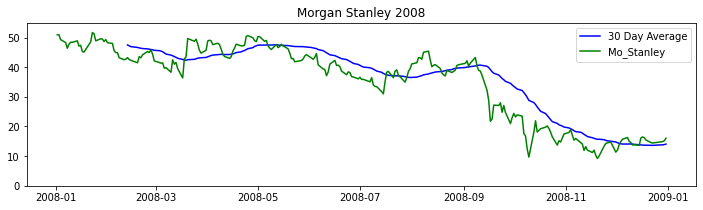

In [48]:
#Morgan Stanley
fig, axes = plt.subplots(figsize = (12,3))
axes.plot(ClosingBankStocks_2008.set_index('Date').rolling(window=30).mean()['Mo_Stanley'],color='blue', label='30 Day Average')
axes.plot(ClosingBankStocks_2008.set_index('Date')['Mo_Stanley'],color='green', label='Mo_Stanley')
axes.set_ylim(0,55)
axes.set_title('Morgan Stanley 2008')
plt.legend(loc='upper right')

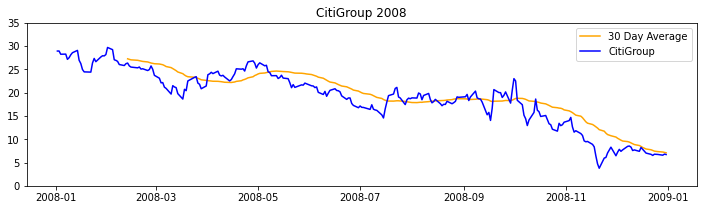

In [49]:
#CitiGroup
fig, axes = plt.subplots(figsize = (12,3))
axes.plot(ClosingBankStocks_2008.set_index('Date').rolling(window=30).mean()['CitiGroup'],color='orange',label='30 Day Average')
axes.plot(ClosingBankStocks_2008.set_index('Date')['CitiGroup'],color='blue',label='CitiGroup')
axes.set_ylim(0,35)
axes.set_title('CitiGroup 2008')
plt.legend(loc='upper right')

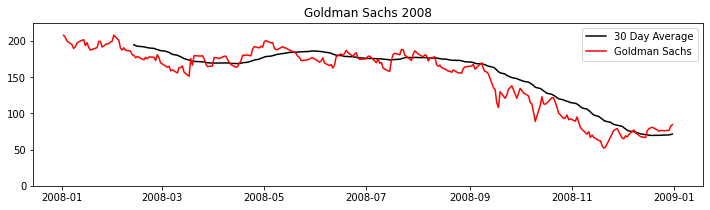

In [51]:
#Goldman Sachs
fig, axes = plt.subplots(figsize = (12,3))
axes.plot(ClosingBankStocks_2008.set_index('Date').rolling(window=30).mean()['Goldman_Sachs'],color='black',label='30 Day Average')
axes.plot(ClosingBankStocks_2008.set_index('Date')['Goldman_Sachs'],color='red',label='Goldman Sachs')
axes.set_ylim(0,225)
axes.set_title('Goldman Sachs 2008')
plt.legend(loc='upper right')

> With reference to each of these three banks' moving averages, we notice quite similar shapes.

## **Conclusion**

>We discovered that due to the magnitude difference in stock price, correlation in closing price did not imply exact correlation in return percent. We also visualized the bank stocks' 2008 decline and noted the heightened volatility they experienced. We discovered that a Citigroup stock split skewed some of our standard deviation results; if we wanted to undertake more study, we could adjust for that anomaly by normalizing our data based on market capitalization.

In [88]:
#End